#*1) clone repo*




In [1]:
!git clone https://github.com/womeramichay/elta_home_assignment

%cd elta_home_assignment


Cloning into 'elta_home_assignment'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 16 (delta 3), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 6.47 KiB | 6.47 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/elta_home_assignment


---
# **2)Kaggle auth**

In [19]:

!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


---
# **3) Download the data**

In [20]:
!mkdir -p data/raw
!kaggle competitions download -c titanic -p data/raw
!unzip -o data/raw/titanic.zip -d data/raw


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  data/raw/titanic.zip
  inflating: data/raw/gender_submission.csv  
  inflating: data/raw/test.csv       
  inflating: data/raw/train.csv      


---

#**4) quick look at the data.**




In [31]:
from pathlib import Path
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

# data downloaded via Kaggle into data/raw/
DATA_PATH = Path("data/raw/train.csv")

df = pd.read_csv(DATA_PATH)

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
# test size
df["Survived"].value_counts()


,count
Survived,
0,549
1,342


In [27]:
# test distribution
df["Survived"].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


# #missing values by col


In [28]:
(df.isna().mean() * 100).sort_values(ascending=False)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [29]:
df.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# **Cross corelation for numeric cols**

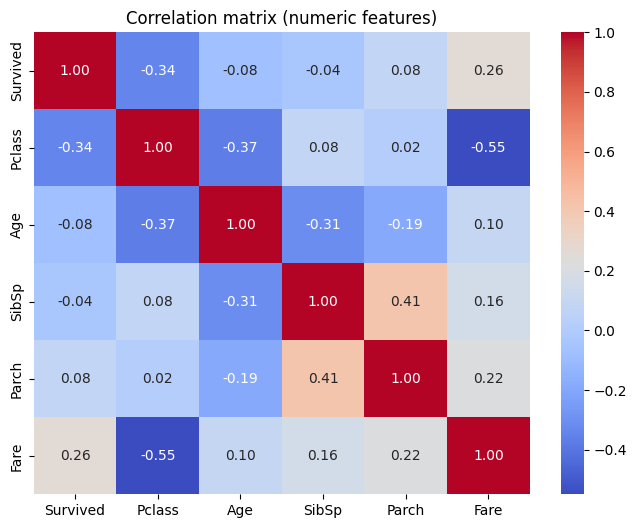

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns including target
numeric_cols = [
    "Survived",
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (numeric features)")
plt.show()


**marckdowm**:
---
After rviewing the cells and CC hit map i decided to drop the follow colums:


*   PassengerId - an arbitrary text that have no corelation to sorvive rate.
*   Name - a text that have no corelation to sorvive rate.
*   Ticket - a text that have no clear stracture, not realy lernable.
*   Cabin - missing to many values.



